In [1]:
from phw_lib import *

In [2]:
# create a constant sequence
fs = 0.5
dt = 1/fs
time_duration = 1000
n_samples = int(time_duration/dt)
t = np.arange(0, time_duration, dt)

sin_wave_freq = 5*1e-3
sin_wave_phase = np.pi/2 + 0.05
sin_wave_amp = 1.0
sin_wave = sin_wave_amp * np.sin(2 * np.pi * sin_wave_freq * t + sin_wave_phase)

In [3]:
def visualize_walkout_for_subplot_with_full_period_sum(xi, dt, f_target):
    """
    Function to visualize phasor walkout for a given time series
    xi: input time series
    dt: sampling interval
    f_target: target frequency for phasor walkout
    """
    phasors, _ = phasor_walkout(xi, dt, f_target)
    samples_per_period = int(1/(f_target*dt))
    N = len(xi)
    phasors = [np.sum(phasors[i:i+samples_per_period]) for i in range(0, N, samples_per_period)]
    cumulative_sums = np.cumsum(phasors)
    
    # Arrow position calculations
    x_pos = np.insert(cumulative_sums.real[:-1], 0, 0)
    y_pos = np.insert(cumulative_sums.imag[:-1], 0, 0)
    
    # use a colormap to color the arrows based on their position on the time series
    colors = np.arange(0, len(phasors)*dt, dt)

    plt.quiver(x_pos, y_pos, np.diff(cumulative_sums.real, prepend=0), np.diff(cumulative_sums.imag, prepend=0), colors, cmap='viridis', angles='xy', scale_units='xy', scale=1)
    # extend the figure to leave more space around the arrows
    #plt.xlim(-2.6*np.max(np.abs(cumulative_sums.real)), 10.6*np.max(np.abs(cumulative_sums.real)))
    plt.ylim(-2.6*np.max(np.abs(cumulative_sums.imag)), 2.6*np.max(np.abs(cumulative_sums.imag)))
    plt.xlim([-0.5, 25*1e2])

    plt.axis('equal')
    #plt.quiver(x_pos, y_pos, np.diff(cumulative_sums.real, prepend=0), np.diff(cumulative_sums.imag, prepend=0), angles='xy', scale_units='xy', scale=1, color='b')
    plt.xlabel('Real', fontsize=16)
    plt.ylabel('Imaginary', fontsize=16)
    plt.gca().ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    plt.grid(True)
    
    return

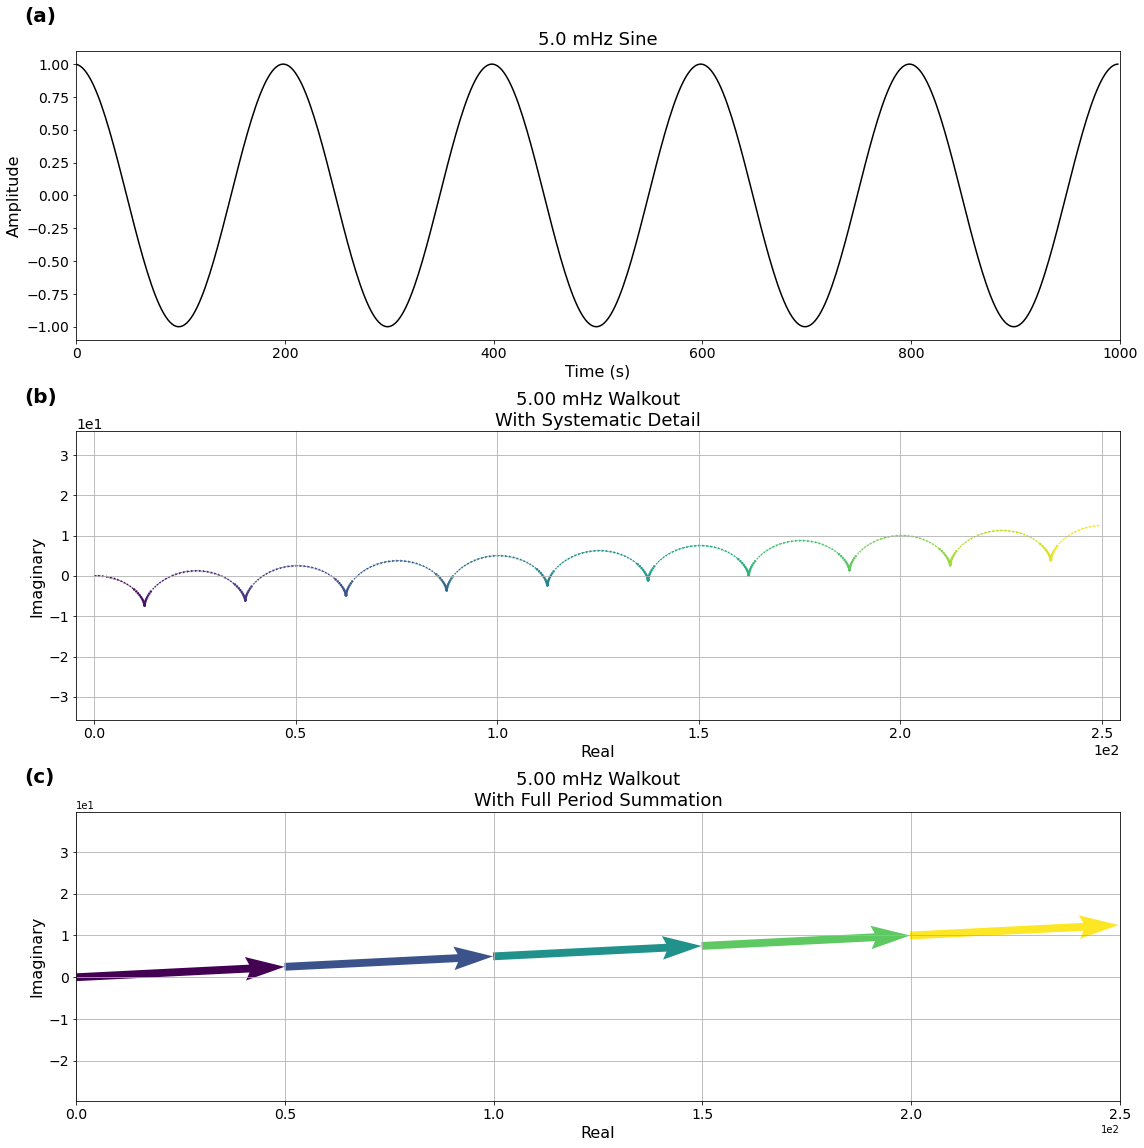

In [4]:
plt.figure(figsize=(16, 16))
plt.subplot(3, 1, 1)
plt.plot(t, sin_wave, 'k')
plt.xlim([0, time_duration])
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title('5.0 mHz Sine', fontsize=18)
plt.text(-0.05, 1.10, '(a)', transform=plt.gca().transAxes, size=20, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(3, 1, 2)
visualize_walkout_for_subplot(sin_wave, dt, sin_wave_freq)
plt.xlim([-0.0, 2.5*1e2])
plt.title('{:.2f} mHz Walkout\nWith Systematic Detail'.format(sin_wave_freq*1e3), fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([-0.0, 2.5*1e2])
plt.ylim([-2,2])
plt.text(-0.05, 1.10, '(b)', transform=plt.gca().transAxes, size=20, weight='bold')


plt.subplot(3, 1, 3)
visualize_walkout_for_subplot_with_full_period_sum(sin_wave, dt, sin_wave_freq)
plt.title('{:.2f} mHz Walkout\nWith Full Period Summation'.format(sin_wave_freq*1e3), fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([-0.0, 2.5*1e2])
plt.text(-0.05, 1.10, '(c)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.tight_layout()
plt.savefig('figure_S3.png', dpi=300)
plt.show()
plt.close()